## Part-of-Speech tagging using CRF

### Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import sklearn


In [2]:
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
# first few tagged sentences
print(wsj[:2])
print(len(wsj))

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]
3914


In [4]:
# reading the Brown tagged sentences
brown= list(nltk.corpus.brown.tagged_sents(tagset='universal'))

In [5]:
# first few tagged sentences
print(brown[:2])
print(len(brown))

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [6]:
# reading the conll2000 tagged sentences
conll2000= list(nltk.corpus.conll2000.tagged_sents(tagset='universal'))

In [7]:
# first few tagged sentences
print(conll2000[:2])
print(len(conll2000))

[[('Confidence', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('pound', 'NOUN'), ('is', 'VERB'), ('widely', 'ADV'), ('expected', 'VERB'), ('to', 'PRT'), ('take', 'VERB'), ('another', 'DET'), ('sharp', 'ADJ'), ('dive', 'NOUN'), ('if', 'ADP'), ('trade', 'NOUN'), ('figures', 'NOUN'), ('for', 'ADP'), ('September', 'NOUN'), (',', '.'), ('due', 'ADJ'), ('for', 'ADP'), ('release', 'NOUN'), ('tomorrow', 'NOUN'), (',', '.'), ('fail', 'VERB'), ('to', 'PRT'), ('show', 'VERB'), ('a', 'DET'), ('substantial', 'ADJ'), ('improvement', 'NOUN'), ('from', 'ADP'), ('July', 'NOUN'), ('and', 'CONJ'), ('August', 'NOUN'), ("'s", 'PRT'), ('near-record', 'ADJ'), ('deficits', 'NOUN'), ('.', '.')], [('Chancellor', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('Exchequer', 'NOUN'), ('Nigel', 'NOUN'), ('Lawson', 'NOUN'), ("'s", 'PRT'), ('restated', 'VERB'), ('commitment', 'NOUN'), ('to', 'PRT'), ('a', 'DET'), ('firm', 'NOUN'), ('monetary', 'ADJ'), ('policy', 'NOUN'), ('has', 'VERB'), ('helped', 'VERB'), ('to', 'PRT'), ('prev

In [8]:
#Merging all the corpus data
nltk_data = wsj + brown + conll2000
print(nltk_data[:2])
print(len(nltk_data))

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]
72202


In [9]:
#Lets see the first sentence in the data
nltk_data[1]

[('Mr.', 'NOUN'),
 ('Vinken', 'NOUN'),
 ('is', 'VERB'),
 ('chairman', 'NOUN'),
 ('of', 'ADP'),
 ('Elsevier', 'NOUN'),
 ('N.V.', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Dutch', 'NOUN'),
 ('publishing', 'VERB'),
 ('group', 'NOUN'),
 ('.', '.')]

In [13]:
# Getting list of tagged words in corpus
tagged_words = [tup for sent in nltk_data for tup in sent]
#Get the length of the total tagged words in training set
len(tagged_words)

1520972

In [16]:
# View the first 10 tokens/words in the corpus
tokens = [pair[0] for pair in tagged_words]
tokens[:10]

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the']

In [17]:
# Get the total unique words in the training Corpus
V = set(tokens)
print(len(V))

67067


In [14]:
# number of pos tags in the training corpus
T = set([pair[1] for pair in tagged_words])
print(len(T))
print(T)

12
{'VERB', 'PRON', '.', 'NUM', 'X', 'DET', 'ADV', 'CONJ', 'PRT', 'NOUN', 'ADJ', 'ADP'}


As expected there are 12 tags which are part of universal tagset

### 1. Build your CRF

In [32]:
#Import snowball stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

<p>
Let us create a function to extract the word features given sentence<br>
The features corresponding to a particular word are explained below<br>
</p>

<p>
'word': the word which we are trying to tag <br>
'bias': Introduce bias so that if the word is not part of any derived features the probability wont be zero <br>
'is_capitalized': Check if the first letter in the word is capitalized or not <br>
'is_all_caps': Check if the entire word is capitalized <br>
'is_all_lower': Check if the entire word is in lower case <br>
'is_numeric': Check if the whole word is a number <br>
'has_no_digit': True if there is no digit in the word <br>
'has_no_punc': True if there is no punctuation in the word like .,:,; etc <br>
'has_no_only_punc': False if the entire word consists of only punctuation marks <br>
'capitals_inside': Chekc if the word is having capital letters or not <br>
'has_no_ing': check if the word ends with ing to indicate if it is a gerund verb feature <br>             
'has_no_ed': check if the word ends with ed to indicate if it is a past verb feature <br>              
'has_no_es': check if the word ends with es to indicate if it is a singular verb feature <br>               
'has_no_ould': check if the word ends with ould to indicate if it is a modal verb feature <br>             
'is_no_possessive':check if the word is a possessive noun feature <br>            
'is_no_plural': check if the word is a plural noun feature <br>
'is_no_cardinal': check if the word is a cardinal <br>
'is_no_article': check if the word is an article <br>
'is_no_adj': check if the word ends with 'able' to indicate if it is an adjective feature <br>
'is_no_noun': check if the word ends with 'ness' to indicate if it is an adjective formed noun <br> 
'is_no_adv': check if the word ends with 'aly' to indicate if it is an adverb <br>
'suff_1': last letter of word <br>  
'suff_2': last two letters of word <br> 
'suff_3': last three letters of word <br>  
'suff_4': last 4 letters of word <br> 
'pref_1': first letter of word <br>  
'pref_2': firt two letters of word <br> 
'pref_3': first three letters of word <br> 
'pref_4': first 4 letters of word <br>
'lemma': stem of the word <br>
</p>

<p>
Also for the features related to previous word in the sentence the above mentioned features are appended with '-1:'<br>
This implies '-1:is_no_cardinal' indicates if the previous word is cardinal or not<br>
Like wise '+1' is appended to the features to indicate the feature of next word.<br>
This implies '+1:is_no_cardinal' indicates if the next word is cardinal or not<br>
<p>
 

In [30]:
# extract features from a given sentence

def word_features(sent, i):
    word = sent[i][0]    
    features = {
            'word':word, #word 
            'bias': 1.0, #Introduce bias 
            'is_capitalized': word[0].upper() == word[0],
            'is_all_caps': word.upper() == word,
            'is_all_lower': word.lower() == word,
            'is_numeric': word.isdigit(),
            'has_no_digit': None==re.search(r'[0-9]+',word),
            'has_no_punc': None==re.search(r'[\.\,\:\;\(\)\[\]\?\!]+',word),
            'has_no_only_punc': None==re.search(r'^[\.\,\:\;\(\)\[\]\?\!]+$',word),
            'capitals_inside': word[1:].lower() != word[1:],
            'has_no_ing': None==re.search(r'.*ing$', word),             
            'has_no_ed': None==re.search(r'.*ed$', word),              
            'has_no_es': None==re.search(r'.*es$', word),               
            'has_no_ould': None==re.search(r'.*ould$', word),              
            'is_no_possessive':None==re.search(r'.*\'s$', word),              
            'is_no_plural': None==re.search(r'.*s$', word), 
            'is_no_cardinal': None==re.search(r'^-?[0-9]+(.[0-9]+)?$', word),
            'is_no_article': None==re.search(r'(The|the|A|a|An|an)$', word),
            'is_no_adj': None==re.search(r'.*able$', word), 
            'is_no_noun': None==re.search(r'.*ness$', word), 
            'is_no_adv': None==re.search(r'.*ly$', word), 
            'suff_1': word[-1:],  
            'suff_2': word[-2:],  
            'suff_3': word[-3:],  
            'suff_4': word[-4:], 
            'pref_1': word[:1],  
            'pref_2': word[:2],  
            'pref_3': word[:3], 
            'pref_4': word[:4],
            'lemma': stemmer.stem(word),
    }

    if i > 0:
        word1 = sent[i-1][0]

        features.update({   
            '-1:word' : word1,
            '-1:is_capitalized': word1.upper() == word1,
            '-1:is_all_caps': word1.upper() == word1,
            '-1:is_all_lower': word1.lower() == word1,
            '-1:has_no_digit': None==re.search(r'[0-9]+',word1),
            '-1:has_no_punc': None==re.search(r'[\.\,\:\;\(\)\[\]\?\!]+',word1),
            '-1:has_no_only_punc': None==re.search(r'^[\.\,\:\;\(\)\[\]\?\!]+$',word1),
            '-1:capitals_inside': word[1:].lower() != word1[1:],
            '-1:has_no_ing': None==re.search(r'.*ing$', word1),             
            '-1:has_no_ed': None==re.search(r'.*ed$', word1),              
            '-1:has_no_es': None==re.search(r'.*es$', word1),               
            '-1:has_no_ould': None==re.search(r'.*ould$', word1),              
            '-1:is_no_possessive':None==re.search(r'.*\'s$', word1),              
            '-1:is_no_plural': None==re.search(r'.*s$', word1), 
            '-1:is_no_cardinal': None==re.search(r'^-?[0-9]+(.[0-9]+)?$', word1),
            '-1:is_no_article': None==re.search(r'(The|the|A|a|An|an)$', word1),
            '-1:is_no_adj': None==re.search(r'.*able$', word1), 
            '-1:is_no_noun': None==re.search(r'.*ness$', word1), 
            '-1:is_no_adv': None==re.search(r'.*ly$', word1), 
            '-1:suff_1': word1[-1:],  
            '-1:suff_2': word1[-2:],  
            '-1:suff_3': word1[-3:],  
            '-1:suff_4': word1[-4:], 
            '-1:pref_1': word1[:1],  
            '-1:pref_2': word1[:2],  
            '-1:pref_3': word1[:3], 
            '-1:pref_4': word1[:4],
            '-1:lemma': stemmer.stem(word1),
        })
    else:
        features.update({   
            '-1:word': '<START>',
        })
    
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.update({
            '+1:word': word1,
            '+1:is_capitalized': word1.upper() == word1,
            '+1:is_all_caps': word1.upper() == word1,
            '+1:is_all_lower': word1.lower() == word1,
            '+1:is_numeric': word1.isdigit(),
            '+1:has_no_digit': None==re.search(r'[0-9]+',word1),
            '+1:has_no_punc': None==re.search(r'[\.\,\:\;\(\)\[\]\?\!]+',word1),
            '+1:has_no_only_punc': None==re.search(r'^[\.\,\:\;\(\)\[\]\?\!]+$',word1),
            '+1:capitals_inside': word[1:].lower() != word1[1:],
            '+1:has_no_ing': None==re.search(r'.*ing$', word1),             
            '+1:has_no_ed': None==re.search(r'.*ed$', word1),              
            '+1:has_no_es': None==re.search(r'.*es$', word1),               
            '+1:has_no_ould': None==re.search(r'.*ould$', word1),              
            '+1:is_no_possessive':None==re.search(r'.*\'s$', word1),              
            '+1:is_no_plural': None==re.search(r'.*s$', word1), 
            '+1:is_no_cardinal': None==re.search(r'^-?[0-9]+(.[0-9]+)?$', word1),
            '+1:is_no_article': None==re.search(r'(The|the|A|a|An|an)$', word1),
            '+1:is_no_adj': None==re.search(r'.*able$', word1), 
            '+1:is_no_noun': None==re.search(r'.*ness$', word1), 
            '+1:is_no_adv': None==re.search(r'.*ly$', word1), 
            '+1:suff_1': word1[-1:],  
            '+1:suff_2': word1[-2:],  
            '+1:suff_3': word1[-3:],  
            '+1:suff_4': word1[-4:], 
            '+1:pref_1': word1[:1],  
            '+1:pref_2': word1[:2],  
            '+1:pref_3': word1[:3], 
            '+1:pref_4': word1[:4],
            '+1:lemma': stemmer.stem(word1),
        })
    else:
        features.update({
            '+1:word': '<END>',
        })
    
    return features

In [18]:
#Extract features given sentence
def sent2features(sent):
    return [word_features(sent, i) for i in range(len(sent))]

#Extract pos tags given sentence
def sent2pos(sent):
    return [postag for token, postag in sent]

#Extract word tags given sentence
def sent2tokens(sent):
    return [token for token, postag in sent]

In [126]:
#Get the word features as input to the alogrithm
X = [sent2features(sent) for sent in nltk_data]
#Get the pos tags as output which has to be predicted by the alogrithm
y = [sent2pos(sent) for sent in nltk_data]

In [39]:
#Lets see the features related to first sentence
X[0]

[{'word': 'Pierre',
  'bias': 1.0,
  'is_capitalized': True,
  'is_all_caps': False,
  'is_all_lower': False,
  'is_numeric': False,
  'has_no_digit': True,
  'has_no_punc': True,
  'has_no_only_punc': True,
  'capitals_inside': False,
  'has_no_ing': True,
  'has_no_ed': True,
  'has_no_es': True,
  'has_no_ould': True,
  'is_no_possessive': True,
  'is_no_plural': True,
  'is_no_cardinal': True,
  'is_no_article': True,
  'is_no_adj': True,
  'is_no_noun': True,
  'is_no_adv': True,
  'suff_1': 'e',
  'suff_2': 're',
  'suff_3': 'rre',
  'suff_4': 'erre',
  'pref_1': 'P',
  'pref_2': 'Pi',
  'pref_3': 'Pie',
  'pref_4': 'Pier',
  'lemma': 'pierr',
  '-1:word': '<START>',
  '+1:word': 'Vinken',
  '+1:is_capitalized': False,
  '+1:is_all_caps': False,
  '+1:is_all_lower': False,
  '+1:is_numeric': False,
  '+1:has_no_digit': True,
  '+1:has_no_punc': True,
  '+1:has_no_only_punc': True,
  '+1:capitals_inside': True,
  '+1:has_no_ing': True,
  '+1:has_no_ed': True,
  '+1:has_no_es': Tru

In [127]:
#Divide the data into train and test sets with 80-20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# import sklearn crfsuite packages
from sklearn.preprocessing import LabelBinarizer


import sklearn_crfsuite
from sklearn_crfsuite import metrics
from sklearn_crfsuite import scorers

In [18]:
# Lets create a basic crf model with default parameters and check its accuracy
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CPU times: user 17min 16s, sys: 2.43 s, total: 17min 18s
Wall time: 17min 16s


In [19]:
#Extract labels from predicted values
labels = list(crf.classes_)

In [20]:
#Get the predictions on test data and check accuracy
y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred,
                      average='weighted', labels=labels)

0.9509576492962789

We acheived 95% of accuracy with a basic model without tuning the hyper parameters.

In [21]:
#Get the sorted labels
sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)

#Print precision, recall and f1-score for each label
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

             precision    recall  f1-score   support

          .      0.999     0.999     0.999     38387
          X      0.981     0.833     0.901      1589
        ADJ      0.860     0.844     0.852     21451
        ADP      0.959     0.967     0.963     36649
        ADV      0.910     0.891     0.900     13706
       VERB      0.952     0.950     0.951     46647
        DET      0.974     0.983     0.978     34071
       CONJ      0.992     0.992     0.992      9518
       NOUN      0.942     0.956     0.949     77256
       PRON      0.981     0.921     0.950     11865
        PRT      0.880     0.874     0.877      8289
        NUM      0.975     0.962     0.969      5776

avg / total      0.951     0.951     0.951    305204



Labels like '.','X','CONJ','DET' have more than 97% f1-score. However 'Adj' and 'PRT' have less than 90%. Let us tune the hyper parameters and check if we can improve the model 

In [23]:
%%time
import scipy
from sklearn.metrics import make_scorer
from sklearn.grid_search import RandomizedSearchCV

# define fixed parameters and parameters to search
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)

# parameters defined in exponential space
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search through using randomized dearch as it is faster than grid search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=3,
                        n_jobs=2,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] c1=0.31947230365809504, c2=0.08717855751344088 ..................
[CV] c1=0.31947230365809504, c2=0.08717855751344088 ..................
[CV]  c1=0.31947230365809504, c2=0.08717855751344088, score=0.971285 -12.0min
[CV] c1=0.31947230365809504, c2=0.08717855751344088 ..................
[CV]  c1=0.31947230365809504, c2=0.08717855751344088, score=0.970729 -12.5min
[CV] c1=0.026798472170961516, c2=0.005011939684111806 ................
[CV]  c1=0.026798472170961516, c2=0.005011939684111806, score=0.968379 -12.0min
[CV]  c1=0.31947230365809504, c2=0.08717855751344088, score=0.971130 -12.7min
[CV] c1=0.026798472170961516, c2=0.005011939684111806 ................
[CV] c1=0.026798472170961516, c2=0.005011939684111806 ................
[CV]  c1=0.026798472170961516, c2=0.005011939684111806, score=0.968621 -11.7min
[CV] c1=0.04822744582989585, c2=0.06229404380103958 ..................
[CV]  c1=0.026798472170961516, c2=0.00501193968

[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 173.3min


[CV] c1=0.22523882108155915, c2=0.02431169032810629 ..................
[CV]  c1=0.22523882108155915, c2=0.02431169032810629, score=0.970993 -12.0min
[CV] c1=0.6391310313208318, c2=0.09925924780427237 ...................
[CV]  c1=0.22523882108155915, c2=0.02431169032810629, score=0.971004 -11.9min
[CV] c1=0.6391310313208318, c2=0.09925924780427237 ...................
[CV]  c1=0.6391310313208318, c2=0.09925924780427237, score=0.970452 -12.0min
[CV] c1=0.6391310313208318, c2=0.09925924780427237 ...................
[CV]  c1=0.6391310313208318, c2=0.09925924780427237, score=0.970966 -11.7min
[CV] c1=0.5891799194542432, c2=0.029737456758759648 ..................
[CV]  c1=0.6391310313208318, c2=0.09925924780427237, score=0.970962 -11.7min
[CV] c1=0.5891799194542432, c2=0.029737456758759648 ..................
[CV]  c1=0.5891799194542432, c2=0.029737456758759648, score=0.970453 -12.0min
[CV] c1=0.5891799194542432, c2=0.029737456758759648 ..................
[CV]  c1=0.5891799194542432, c2=0.0297

[CV] c1=1.2364988056086927, c2=0.00587850061963591 ...................
[CV] c1=1.2364988056086927, c2=0.00587850061963591 ...................
[CV]  c1=1.2364988056086927, c2=0.00587850061963591, score=0.969564 -11.7min
[CV] c1=1.2364988056086927, c2=0.00587850061963591 ...................
[CV]  c1=1.2364988056086927, c2=0.00587850061963591, score=0.970155 -11.8min
[CV] c1=0.1728585939222077, c2=0.16699355010911204 ...................
[CV]  c1=1.2364988056086927, c2=0.00587850061963591, score=0.970027 -11.5min
[CV] c1=0.1728585939222077, c2=0.16699355010911204 ...................
[CV]  c1=0.1728585939222077, c2=0.16699355010911204, score=0.970600 -12.2min
[CV] c1=0.1728585939222077, c2=0.16699355010911204 ...................
[CV]  c1=0.1728585939222077, c2=0.16699355010911204, score=0.971044 -12.1min
[CV] c1=0.17107892823818033, c2=0.004601878822289607 .................
[CV]  c1=0.1728585939222077, c2=0.16699355010911204, score=0.971141 -12.0min
[CV] c1=0.17107892823818033, c2=0.0046018

[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed: 757.2min


[CV] c1=0.08496762592919263, c2=0.10650844718538649 ..................
[CV]  c1=0.08496762592919263, c2=0.10650844718538649, score=0.970886 -11.7min
[CV]  c1=0.08496762592919263, c2=0.10650844718538649, score=0.970756 -12.2min
[CV] c1=0.6374883688914037, c2=0.01161937195165156 ...................
[CV] c1=0.6374883688914037, c2=0.01161937195165156 ...................
[CV]  c1=0.6374883688914037, c2=0.01161937195165156, score=0.971034 -11.9min
[CV]  c1=0.6374883688914037, c2=0.01161937195165156, score=0.970470 -12.2min
[CV] c1=0.6374883688914037, c2=0.01161937195165156 ...................
[CV] c1=0.34456261705111546, c2=0.039916760765104614 .................
[CV]  c1=0.6374883688914037, c2=0.01161937195165156, score=0.970896 -11.9min
[CV] c1=0.34456261705111546, c2=0.039916760765104614 .................
[CV]  c1=0.34456261705111546, c2=0.039916760765104614, score=0.970873 -12.4min
[CV] c1=0.34456261705111546, c2=0.039916760765104614 .................
[CV]  c1=0.34456261705111546, c2=0.03

[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed: 916.7min finished


CPU times: user 56min 37s, sys: 3min 17s, total: 59min 55s
Wall time: 15h 34min 44s


In [36]:
#Save the model to disk using pickle
import pickle

In [40]:
#set the file name
filename = 'random_search_model.pk'

In [25]:
# save the model to disk
pickle.dump(rs, open(filename, 'wb'))

In [28]:
# load the model from disk
loaded_model_rs = pickle.load(open(filename, 'rb'))

In [29]:
# Get the best estimators of the model
print('best params:', loaded_model_rs.best_params_)
print('best CV score:', loaded_model_rs.best_score_)
print('model size: {:0.2f}M'.format(loaded_model_rs.best_estimator_.size_ / 1000000))

best params: {'c1': 0.34456261705111546, 'c2': 0.039916760765104614}
best CV score: 0.9711056539075189
model size: 8.20M


In [30]:
#Import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Dark blue => 0.9648, dark red => 0.9711


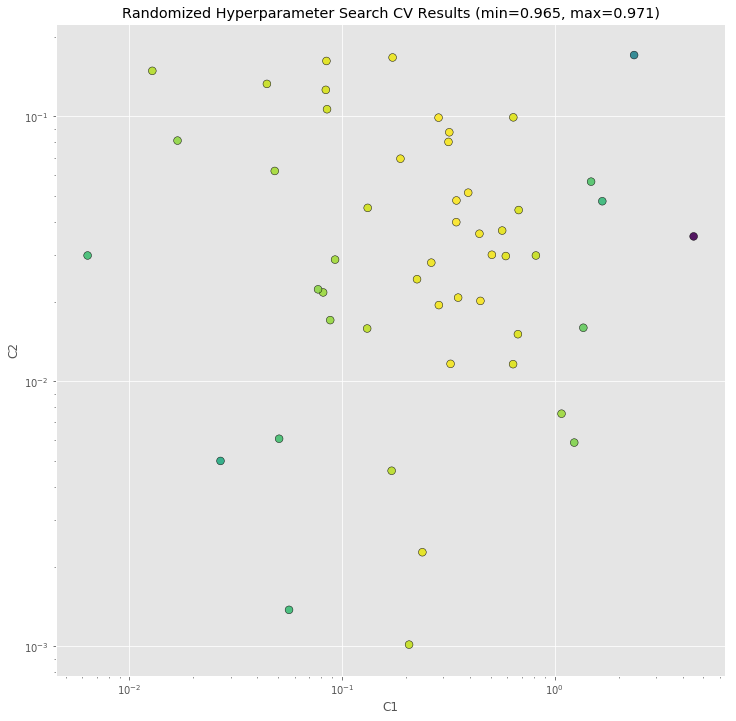

In [31]:
#Visualize the results through gg-plot
_x = [s.parameters['c1'] for s in loaded_model_rs.grid_scores_]
_y = [s.parameters['c2'] for s in loaded_model_rs.grid_scores_]
_c = [s.mean_validation_score for s in loaded_model_rs.grid_scores_]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

We got minimum f1-score as 0.965 and maximum f1-score as 0.971 at parameters {'c1': 0.34456261705111546, 'c2': 0.039916760765104614}


Now we use grid search to further tune the hyper parameters in the nearby space of the best hyperparameters obtained from randomozed search

In [34]:
%%time
from sklearn.grid_search import GridSearchCV
# import grid search
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
# define fixed parameters and parameters to search
params_space = {
    'c1': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45],
    'c2': [0.02, 0.03, 0.04, 0.05],
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
gs = GridSearchCV(crf, params_space,
                        cv=3,
                        verbose=3,
                        n_jobs=3,
                        scoring=f1_scorer)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] c1=0.2, c2=0.02 .................................................
[CV] c1=0.2, c2=0.02 .................................................
[CV] c1=0.2, c2=0.02 .................................................
[CV] ........................ c1=0.2, c2=0.02, score=0.970506 -13.1min
[CV] ........................ c1=0.2, c2=0.02, score=0.970898 -12.9min
[CV] ........................ c1=0.2, c2=0.02, score=0.971050 -12.8min
[CV] c1=0.2, c2=0.03 .................................................
[CV] c1=0.2, c2=0.03 .................................................
[CV] c1=0.2, c2=0.03 .................................................
[CV] ........................ c1=0.2, c2=0.03, score=0.970677 -14.0min
[CV] ........................ c1=0.2, c2=0.03, score=0.970809 -12.6min
[CV] c1=0.2, c2=0.04 .................................................
[CV] ........................ c1=0.2, c2=0.03, score=0.970992 -14.6min
[CV] c1=0.2, c2=

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 142.2min


[CV] ........................ c1=0.3, c2=0.02, score=0.971237 -12.7min
[CV] c1=0.3, c2=0.03 .................................................
[CV] c1=0.3, c2=0.03 .................................................
[CV] c1=0.3, c2=0.03 .................................................
[CV] ........................ c1=0.3, c2=0.03, score=0.970723 -14.3min
[CV] ........................ c1=0.3, c2=0.03, score=0.971239 -13.5min
[CV] ........................ c1=0.3, c2=0.03, score=0.971172 -12.7min
[CV] c1=0.3, c2=0.04 .................................................
[CV] c1=0.3, c2=0.04 .................................................
[CV] c1=0.3, c2=0.04 .................................................
[CV] ........................ c1=0.3, c2=0.04, score=0.970735 -13.3min
[CV] c1=0.3, c2=0.05 .................................................
[CV] ........................ c1=0.3, c2=0.04, score=0.971182 -14.5min
[CV] ........................ c1=0.3, c2=0.04, score=0.971202 -13.4min
[CV] c

[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed: 378.9min finished


CPU times: user 38min 33s, sys: 6min 14s, total: 44min 48s
Wall time: 6h 37min 36s


In [35]:
#Get the best parameters
gs.best_params_

{'c1': 0.35, 'c2': 0.05}

In [43]:
#Let's build a final model with the best parameters obtained from the gridsearch
final_crf = crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True,
    c1=0.35,
    c2=0.05
)

final_crf.fit(X_train,y_train)

CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.35, c2=0.05,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [38]:
#set the file name
filename_final = 'Durga__Sasidhar__Attaluri__part__2.pkl'

In [47]:
# save the final model to disk
pickle.dump(final_crf, open(filename_final, 'wb'))

### 2. Evaluate the model performance

In [39]:
# load the final model from disk
loaded_model_final = pickle.load(open(filename_final, 'rb'))

In [129]:
labels = list(loaded_model_final.classes_)

In [49]:
#Get the f1-score of the final model
y_pred = loaded_model_final.predict(X_test)
metrics.flat_f1_score(y_test, y_pred,
                      average='weighted', labels=labels)

0.9726628857528067

In [130]:
#F1-Score on training data
metrics.flat_f1_score(y_train, loaded_model_final.predict(X_train),
                      average='weighted', labels=labels)

0.9881048402530889

The f1-score with hyperparameter tuning further improved to 0.972 for test data wheares for training data the F1 score is around 0.98. Since the test performance is comparable to training metrics, the model is not overfitting. Let's check the performance of the model for each label

In [50]:
#LEts check the scores for each label
sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

             precision    recall  f1-score   support

          .      1.000     1.000     1.000     38387
          X      0.975     0.875     0.922      1589
        ADJ      0.934     0.931     0.933     21451
        ADP      0.967     0.979     0.973     36649
        ADV      0.949     0.931     0.940     13706
       VERB      0.979     0.976     0.978     46647
        DET      0.975     0.985     0.980     34071
       CONJ      0.994     0.996     0.995      9518
       NOUN      0.975     0.979     0.977     77256
       PRON      0.975     0.937     0.956     11865
        PRT      0.911     0.895     0.903      8289
        NUM      0.986     0.994     0.990      5776

avg / total      0.973     0.973     0.973    305204



The f1-score for mosr of the labels is more than 97% and for labels 'ADJ' and 'PRT' the score increased to more than 90%

Let us also evaluate the model on the test sentences

In [22]:
#Read the text file
import codecs
lines=[]
f = codecs.open("Test_sentences.txt", encoding='utf-8')
for line in f:
    print(line)
    lines.append(line)

Android is a mobile operating system developed by Google.

Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.

Twitter is an online news and social networking service on which users post and interact with messages known as tweets.

Before entering politics, Donald Trump was a domineering businessman and a television personality.

The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.

This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.

Show me the cheapest round trips from Dallas to Atlanta

I would like to see flights from Denver to Philadelphia.

Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.

NASA invited social media users to experience the launch of ICESAT-2 Satelli

In [23]:
#Strip the special characters and empty strings in the list file
test_lines =[sent.rstrip() for sent in lines if sent.rstrip()!='']
test_lines

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [105]:
#Convert the test lines into tokenized lines
test_tokenized_lines = [word_tokenize(sent) for sent in test_lines]

In [111]:
#Converting the test data into word features for required format
test_formatted_lines=[]
for sent in test_tokenized_lines:
    formattedWords=[]
    for word in sent:
        formattedWords.append((word,'TAG'))
    test_formatted_lines.append(formattedWords)
test_formatted_lines

[[('Android', 'TAG'),
  ('is', 'TAG'),
  ('a', 'TAG'),
  ('mobile', 'TAG'),
  ('operating', 'TAG'),
  ('system', 'TAG'),
  ('developed', 'TAG'),
  ('by', 'TAG'),
  ('Google', 'TAG'),
  ('.', 'TAG')],
 [('Android', 'TAG'),
  ('has', 'TAG'),
  ('been', 'TAG'),
  ('the', 'TAG'),
  ('best-selling', 'TAG'),
  ('OS', 'TAG'),
  ('worldwide', 'TAG'),
  ('on', 'TAG'),
  ('smartphones', 'TAG'),
  ('since', 'TAG'),
  ('2011', 'TAG'),
  ('and', 'TAG'),
  ('on', 'TAG'),
  ('tablets', 'TAG'),
  ('since', 'TAG'),
  ('2013', 'TAG'),
  ('.', 'TAG')],
 [('Google', 'TAG'),
  ('and', 'TAG'),
  ('Twitter', 'TAG'),
  ('made', 'TAG'),
  ('a', 'TAG'),
  ('deal', 'TAG'),
  ('in', 'TAG'),
  ('2015', 'TAG'),
  ('that', 'TAG'),
  ('gave', 'TAG'),
  ('Google', 'TAG'),
  ('access', 'TAG'),
  ('to', 'TAG'),
  ('Twitter', 'TAG'),
  ("'s", 'TAG'),
  ('firehose', 'TAG'),
  ('.', 'TAG')],
 [('Twitter', 'TAG'),
  ('is', 'TAG'),
  ('an', 'TAG'),
  ('online', 'TAG'),
  ('news', 'TAG'),
  ('and', 'TAG'),
  ('social', 'TAG')

In [119]:
#Get the predictions on the test sentences
X_test_list = [sent2features(sent) for sent in test_formatted_lines]
pred_test = loaded_model_final.predict(X_test_list)
#Print the tags and words on the test sentences
for key,tag_list in enumerate(pred_test):
    print([(word[0],tag_list[index])for index,word in enumerate(test_formatted_lines[key])])

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'VERB'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.')]
[('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'ADJ'), ('on', 'ADP'), ('smartphones', 'NOUN'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.')]
[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'DET'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.')]
[('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'ADJ'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), 

We see all the data is properly tagged using the CRF model on the test sentences

### 3. Interpret the model (enlist important state and transition features)

In [120]:
from collections import Counter

#Print top 20 likely and unlinkely transition features
def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(loaded_model_final.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(loaded_model_final.transition_features_).most_common()[-20:])

Top likely transitions:
X      -> X       6.537925
PRT    -> VERB    1.486604
PRON   -> VERB    1.384537
NOUN   -> PRON    1.287798
ADJ    -> NOUN    1.241147
ADV    -> ADJ     0.919569
DET    -> NOUN    0.830466
PRT    -> PRON    0.734951
ADV    -> ADV     0.733629
ADP    -> DET     0.713143
DET    -> ADJ     0.693239
VERB   -> PRT     0.649433
DET    -> X       0.562067
ADJ    -> NUM     0.545942
PRT    -> ADP     0.535449
NOUN   -> VERB    0.520579
ADP    -> PRON    0.469841
NOUN   -> ADP     0.468586
NUM    -> NOUN    0.430849
.      -> .       0.430486

Top unlikely transitions:
PRT    -> PRT     -0.867162
NOUN   -> X       -0.886277
NUM    -> DET     -0.908193
NOUN   -> ADJ     -1.052190
VERB   -> X       -1.083206
PRT    -> ADJ     -1.128811
PRT    -> NOUN    -1.131032
X      -> ADV     -1.170937
CONJ   -> CONJ    -1.324191
NUM    -> VERB    -1.391655
ADJ    -> VERB    -1.410759
DET    -> ADP     -1.451965
ADV    -> X       -1.469510
ADJ    -> DET     -1.473264
CONJ   -> .      

From the results that it is more likely that X is transitioned by X and it has very high weightage.
Probably something like 'Name :- BBBB', here ':' is followed by '-' and it is most likely that special characters are grouped together

Also <br>
PRT->Verb (Ex - A falling tree) <br>
Pron -> Verb (Ex - I am) <br>
are also indicated as most likely transitions which is expected according to the general grammar tag occurences

Also as expected the transitions like PRT -> PRT, Noun -> X are very least likely transitions

In [121]:
#Print top 30 likely and unlinkely state features
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(loaded_model_final.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(loaded_model_final.state_features_).most_common()[-30:])

Top positive:
10.711321 .        suff_1:$
9.739830 ADJ      word:willing
9.179332 PRT      suff_2:'d
9.080154 ADJ      word:lovely
8.252115 DET      lemma:some
8.172859 DET      lemma:ani
8.117664 X        pref_1:*
8.078919 ADP      lemma:for
7.888440 DET      lemma:both
7.846117 CONJ     lemma:or
7.839278 PRON     lemma:us
7.607184 CONJ     lemma:and
7.536680 ADJ      suff_3:ous
7.289233 ADP      lemma:toward
7.236059 NOUN     lemma:someth
7.205561 DET      lemma:everi
6.998304 NOUN     suff_1:%
6.979564 ADJ      word:interesting
6.969547 VERB     lemma:has
6.955246 VERB     lemma:was
6.927070 PRON     lemma:we
6.915256 VERB     word:represents
6.869737 DET      lemma:an
6.758483 ADP      lemma:till
6.754402 NOUN     pref_2:**
6.672556 ADP      lemma:if
6.639919 ADV      suff_4:wise
6.606093 NUM      suff_4:lion
6.582170 VERB     lemma:is
6.520355 ADV      lemma:o'clock

Top negative:
-4.138719 NOUN     pref_2:ei
-4.145769 NOUN     pref_3:eno
-4.241486 NOUN     pref_3:her
-4.247840 NO

For state features \$ is most prominent feature to indicate '.' <br>
Mostly '\$' is followed by a decimal to indicate monetary value. <br>
Ex (500.56 \$) <br>
So its most likely that occurence of decimal '.' has highest dependency on '$' which is obtained by word suffix

Also state features like 'word', 'lemma', suffixes and prefixes form major predictors
Mostly these state features have very less predictive power to identify Nouns 